In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist.train.images.shape

(55000, 784)

In [4]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

In [5]:
print(x)
print(W)
print(b)
print(y)
print(y_)

Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(10,) dtype=float32_ref>
Tensor("add:0", shape=(?, 10), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)


In [6]:
# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
# outputs of 'y', and then average across the batch.

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [7]:
print(cross_entropy)
print("-----")
print(train_step)

Tensor("Mean:0", shape=(), dtype=float32)
-----
name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_Variable/ApplyGradientDescent"
input: "^GradientDescent/update_Variable_1/ApplyGradientDescent"



In [8]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [9]:
# Train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [10]:
x0, y0 = batch_xs[0], batch_ys[0]
x99, y99 = batch_xs[99], batch_ys[99]

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


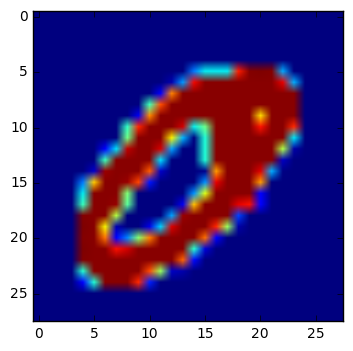

In [11]:
print(y0)
img = np.reshape(x0, (28,28))
plt.imshow(img)
plt.show()

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


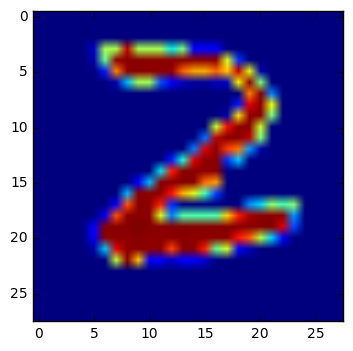

In [12]:
print(y99)
img = np.reshape(x99, (28,28))
plt.imshow(img)
plt.show()

In [13]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9152


In [14]:
W

<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32_ref>

In [15]:
nW = sess.run(W)

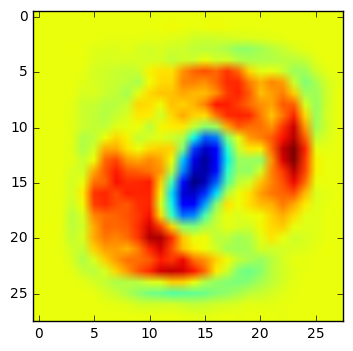

In [18]:
plt.imshow(np.reshape(nW[:,0], (28, 28)))
plt.show()

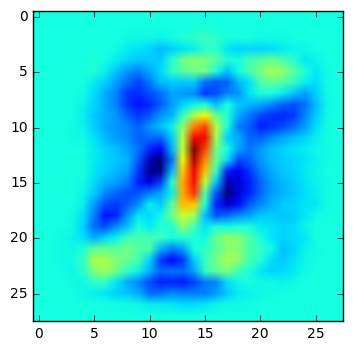

In [19]:
plt.imshow(np.reshape(nW[:,1], (28, 28)))
plt.show()

In [22]:
x = np.reshape(nW[:,1], (28, 28))
print(x.shape)
print(x[15])

(28, 28)
[ -1.98551703e-07  -1.73230330e-06   1.18189538e-03   7.91031984e-04
  -4.47062217e-03  -4.10441943e-02  -8.37835521e-02  -1.06433190e-01
  -1.43442497e-01  -2.45480835e-01  -3.23590130e-01  -2.12204307e-01
   1.92751810e-02   3.92804593e-01   5.69209516e-01   2.23955005e-01
  -6.89902753e-02  -3.68217409e-01  -3.30975622e-01  -2.47752190e-01
  -1.68403938e-01  -1.10965423e-01  -8.05658698e-02  -5.65329082e-02
  -3.25094908e-02  -1.28721539e-02  -3.34911887e-03  -2.78487074e-04]


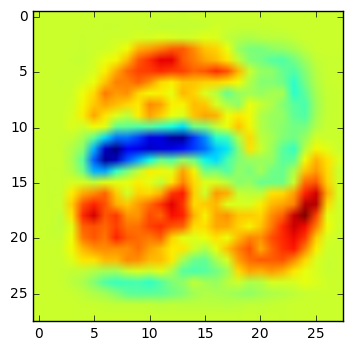

In [20]:
plt.imshow(np.reshape(nW[:,2], (28, 28)))
plt.show()